### Group Members: Danna Alamer, Frederico Levy, Soobin Lim

Principle of Urban Informaticm, Section 001 
# **Measuring the Impact of the New Brooklyn Bridge Bike Path** 


On September 14th, 2021, the New York City Department of Transportation inaugurated a new bike lane on the Brooklyn Bridge. The new lane is bound to change mobility patterns in Brooklyn and Southern Manhattan.



Studying how key pieces of bicycle infrastructure affect mobility patterns in cities is essential to better direct future investment. The analysis shall study shifts in mobility patterns and better understand the implementation of key pieces of bicycle infrastructure mobility in New York City. 

For this project we will be using data collection for Citibike to statistically analyze (distribution analysis, fit distribution, empirical distribution) to analyze bicycle mobility between certain areas in the city. 




In [ ]:
#import all the libraries
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import json
import requests
from shapely.geometry import Point
from google.colab import drive
from sklearn.linear_model import LinearRegression
from scipy.stats import norm #normal
from scipy.stats import genextreme as gev #generalized extreme value
from scipy.stats import pareto #pareto
import datetime as dt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Research Questions:
1. Since the inauguration of the new bike lane, has ridership increased over the bridge?
2.  Has there been a change in the absolute number of bicycle trips across the Brooklyn, Manhattan and Williamsburg bridges?
3. Is there a correlation between the distance of a Citi Bike station to the Brooklyn Bridge and how frequently it is used?
4. Has there been a shift in bicycle mobility patterns around the bridges?
5. Has there been a change in public trasportation traffic volume in the three bridges?
6. Has the air pollution been reduced when bicycles were commonly used in the bridges areas?



### 1. Since the inauguration of the new bike lane, has ridership increased over the bridge?

In [ ]:
# read a file
df = pd.read_csv('/content/drive/MyDrive/PUI_project/data/ridershipCounts.csv')
df.head()



,Count Year,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Ed Koch Queensboro Bridge,Grand Total
0,1980,866,NaN,221,548,"1,635"
1,1985,"1,269",NaN,594,"1,209","3,072"
2,1986,"2,144",NaN,636,"1,243","4,023"
3,1987,"2,270",NaN,557,695,"3,523"
4,1988,"1,374",NaN,427,526,"2,327"


In [ ]:
 # extract 2019 - 2021 data for comparison
yr = df[df['Count Year'] > '2019']
yr.head()

,Count Year,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Ed Koch Queensboro Bridge,Grand Total
36,2019 (avg.),"2,558","6,008","7,089","4,968","20,624"
37,April,"2,318","5,495","5,729","4,048","17,590"
38,May,"2,589","6,031","7,384","4,984","20,988"
39,June,"2,716","6,334","7,770","5,319","22,139"
40,July,"2,607","6,099","7,159","5,270","21,135"


In [ ]:
 # extract 2019 - 2021 data for comparison
year = ['April', 'May', 'June', 'July', 'August', 'September', 'October']
data = yr.loc[yr['Count Year'].isin(year)] 

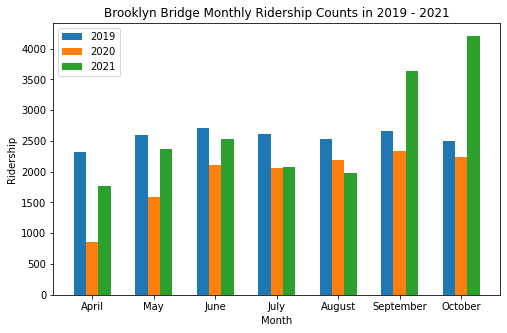

In [ ]:
# visualize Brooklyn Bridge Ridership Counts in 2019 - 2021
plt.figure(figsize=(8,5))
x = np.arange(7)
yr19 = [2318, 2589, 2716, 2607, 2528, 2654, 2492]
yr20 = [866, 1592, 2106, 2059, 2197, 2336, 2239]
yr21 = [1766, 2369, 2529, 2074, 1986, 3635, 4206]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x - 0.2, yr19, width)
plt.bar(x, yr20, width)
plt.bar(x + 0.2, yr21, width)
plt.xticks(x, ['April', 'May', 'June', 'July', 'August', 'September', 'October'])
plt.xlabel("Month")
plt.ylabel("Ridership")
plt.legend(["2019", "2020", "2021"])
plt.title('Brooklyn Bridge Monthly Ridership Counts in 2019 - 2021')
plt.show()

In [ ]:
# Average ridership from 2019 to 2021 
average_ridership = ['2019 (avg.)', '2020 (avg.)', '2021']
data = df.loc[df['Count Year'].isin(average_ridership)]
data.head()

,Count Year,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Ed Koch Queensboro Bridge,Grand Total
36,2019 (avg.),"2,558","6,008","7,089","4,968","20,624"
45,2020 (avg.),"1,914","5,449","7,624","6,267","21,254"
54,2021,"2,652","6,444","7,860","6,463","23,419"


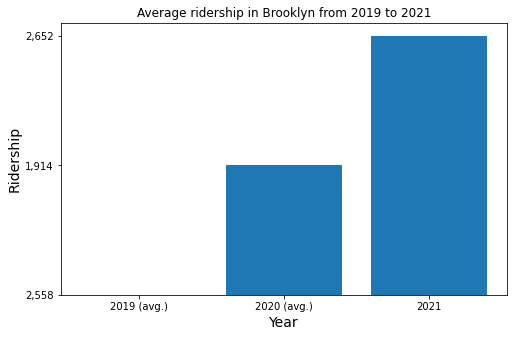

In [ ]:
# visualize the average ridership in Brooklyn Bridge from 2019 to 2021
plt.figure(figsize=(8,5))

plt.bar(average_ridership, data['Brooklyn Bridge'])
plt.title('Average ridership in Brooklyn from 2019 to 2021')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Ridership", fontsize=14)
plt.show()

### 2. Has there been a change in the absolute number of bicycle trips across the Brooklyn, Manhattan and Williamsburg bridges? 

In [ ]:

rider = pd.read_csv('/content/drive/MyDrive/PUI_project/data/ridershipCounts.csv')
rider.head()



,Count Year,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Ed Koch Queensboro Bridge,Grand Total
0,1980,866,NaN,221,548,"1,635"
1,1985,"1,269",NaN,594,"1,209","3,072"
2,1986,"2,144",NaN,636,"1,243","4,023"
3,1987,"2,270",NaN,557,695,"3,523"
4,1988,"1,374",NaN,427,526,"2,327"


In [ ]:
rider.isna().any()

Count Year                   True
Brooklyn Bridge              True
Manhattan Bridge             True
Williamsburg Bridge          True
Ed Koch Queensboro Bridge    True
Grand Total                  True
dtype: bool

In [ ]:
# dropping the rows with NaN values
for c in rider.columns:
    rider.dropna(subset = [c], inplace=True)

In [ ]:
rider.head()

,Count Year,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Ed Koch Queensboro Bridge,Grand Total
29,2013,3418,5678,7597,4243,20935
30,2014,3423,6166,7192,4855,21635
31,2015,3435,6233,7290,5178,22126
32,2016,3640,6203,7580,5203,22626
33,2017,3157,6573,7272,5406,22408


In [ ]:
# Removing the (avg.) text from certain cells in the data
rider['Count Year'] = rider['Count Year'].map(lambda x: x.lstrip('').rstrip('(avg.)'))

In [ ]:
# Keeping only the rows with year number
rider = rider[rider['Count Year'] != 'April']
rider = rider[rider['Count Year'] != 'May']
rider = rider[rider['Count Year'] != 'June']
rider = rider[rider['Count Year'] != 'July']
rider = rider[rider['Count Year'] != 'August']
rider = rider[rider['Count Year'] != 'September']
rider = rider[rider['Count Year'] != 'October']

In [ ]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 17 to 54
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Count Year                 21 non-null     object
 1   Brooklyn Bridge            21 non-null     object
 2   Manhattan Bridge           21 non-null     object
 3   Williamsburg Bridge        21 non-null     object
 4   Ed Koch Queensboro Bridge  21 non-null     object
 5   Grand Total                21 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB


In [ ]:
# Removing the comma from certain cells in the data to be able to conver the numbers in the columns to numeric
rider = rider.replace(',','', regex=True)

In [ ]:
# Converting the values in the data to numeric
rider['Count Year'] = pd.to_numeric(rider['Count Year'])
rider['Brooklyn Bridge'] = pd.to_numeric(rider['Brooklyn Bridge'])
rider['Manhattan Bridge'] = pd.to_numeric(rider['Manhattan Bridge'])
rider['Williamsburg Bridge'] = pd.to_numeric(rider['Williamsburg Bridge'])
rider['Ed Koch Queensboro Bridge'] = pd.to_numeric(rider['Ed Koch Queensboro Bridge'])
rider['Grand Total'] = pd.to_numeric(rider['Grand Total'])

In [ ]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 17 to 54
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Count Year                 21 non-null     int64
 1   Brooklyn Bridge            21 non-null     int64
 2   Manhattan Bridge           21 non-null     int64
 3   Williamsburg Bridge        21 non-null     int64
 4   Ed Koch Queensboro Bridge  21 non-null     int64
 5   Grand Total                21 non-null     int64
dtypes: int64(6)
memory usage: 1.1 KB


In [ ]:
# Keeping only the years that the average numbers of trips is computed
rider = rider[rider['Count Year'] > 2012]

In [ ]:
##we can see that the total number of trips has increased over the years, but not for the Brooklyn Bridge

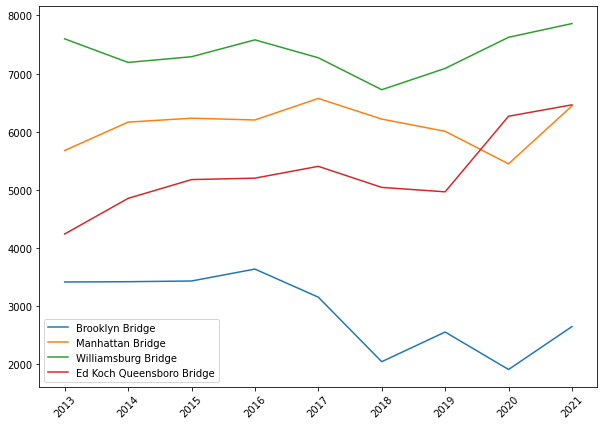

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(rider['Count Year'], rider['Brooklyn Bridge'])
plt.plot(rider['Count Year'], rider['Manhattan Bridge'])
plt.plot(rider['Count Year'], rider['Williamsburg Bridge'])
plt.plot(rider['Count Year'], rider['Ed Koch Queensboro Bridge'])
plt.xticks(rider['Count Year'].values, rotation=45)
plt.legend(['Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Ed Koch Queensboro Bridge'])
plt.show()

In [ ]:
data = rider[rider['Count Year'] > 2019]

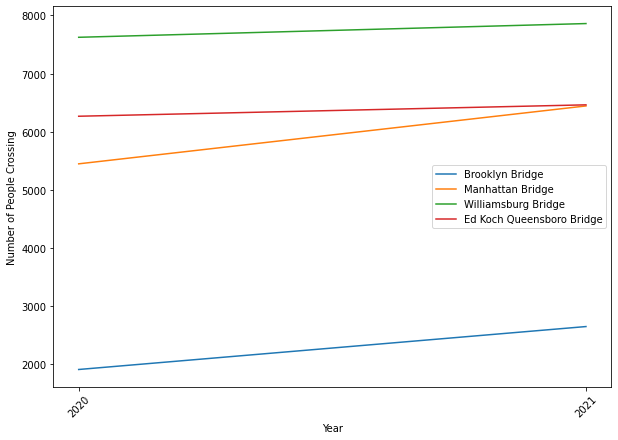

In [ ]:
#close up in the difference between 2020 and 2021

plt.rcParams["figure.figsize"] = (10,7)
plt.plot(data['Count Year'], data['Brooklyn Bridge'])
plt.plot(data['Count Year'], data['Manhattan Bridge'])
plt.plot(data['Count Year'], data['Williamsburg Bridge'])
plt.plot(data['Count Year'], data['Ed Koch Queensboro Bridge'])
plt.xticks(data['Count Year'].values, rotation=45)
plt.legend(['Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Ed Koch Queensboro Bridge'])
plt.ylabel("Number of People Crossing")
plt.xlabel("Year")
plt.show()

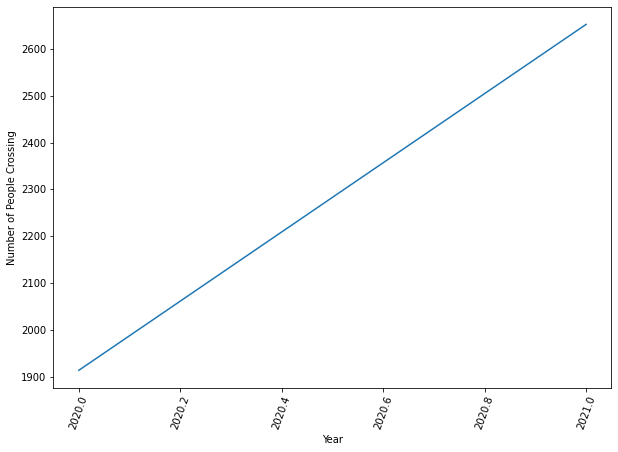

In [ ]:
plt.plot(data['Count Year'], data['Brooklyn Bridge'])
plt.ylabel("Number of People Crossing")
plt.xlabel("Year")
plt.xticks(rotation=70);
plt.show()

### 3. Is there a correlation between the distance of a Citi Bike station to the Brooklyn Bridge and how frequently it is used?

Import borough boundaries from: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

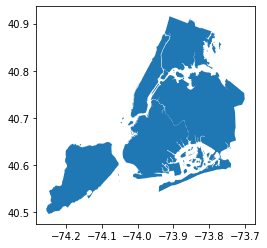

In [ ]:
boroboundaries = gpd.read_file('/content/drive/MyDrive/data/BoroughBoundaries/geo_export_1f2f41ab-ee51-4e7c-970c-3d4acab24b25.shp')
boroboundaries.plot()

In [ ]:
boroboundaries

,boro_code,boro_name,shape_area,shape_leng,geometry
0,1.0,Manhattan,6.366208e+08,359993.127161,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2.0,Bronx,1.187194e+09,463868.935588,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3.0,Brooklyn,1.934174e+09,728195.194837,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
3,5.0,Staten Island,1.623631e+09,325924.002252,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
4,4.0,Queens,3.040206e+09,900269.281914,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8

In [ ]:
brooklynbridge = Point(-73.9969, 40.7061)
boroboundaries

,boro_code,boro_name,shape_area,shape_leng,geometry
0,1.0,Manhattan,6.366208e+08,359993.127161,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2.0,Bronx,1.187194e+09,463868.935588,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3.0,Brooklyn,1.934174e+09,728195.194837,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
3,5.0,Staten Island,1.623631e+09,325924.002252,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
4,4.0,Queens,3.040206e+09,900269.281914,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [ ]:
def define_boros(filepath, brooklynbridge = brooklynbridge):
  df = pd.read_csv(filepath)
  df.dropna(inplace=True)
  df['started_at'] = pd.to_datetime(df['started_at'], format="%Y/%m/%d")
  df['ended_at'] = pd.to_datetime(df['ended_at'], format="%Y/%m/%d")
  df['duration'] = (df['ended_at'] - df['started_at']).dt.seconds
  gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.start_lng, df.start_lat))
  gdf.set_crs(crs="epsg:4326", inplace=True)
  gdf['distance_to_bridge'] = gdf.distance(brooklynbridge)
  gdf = gdf.sjoin(boroboundaries, how='left', op='within')
  gdf.drop(columns=['shape_leng', 'shape_area', 'index_right'], inplace=True)
  gdf['geometry']=gpd.points_from_xy(gdf.end_lng, gdf.end_lat)
  gdf = gdf.sjoin(boroboundaries, how='left', op='within')
  gdf.drop(columns=['shape_leng', 'shape_area', 'index_right'], inplace=True)
  gdf = gdf.loc[gdf['boro_name_left'] != gdf['boro_name_right']]
  df1 = pd.DataFrame(gdf.drop(columns='geometry'))
  df1.dropna(inplace=True)
  return df1

In [ ]:
prebridge = define_boros('/content/drive/MyDrive/data/citibike data/202104-citibike-tripdata.csv')
prebridge = prebridge.append(define_boros('/content/drive/MyDrive/data/citibike data/202105-citibike-tripdata.csv'))
prebridge = prebridge.append(define_boros('/content/drive/MyDrive/data/citibike data/202106-citibike-tripdata.csv'))
prebridge = prebridge.append(define_boros('/content/drive/MyDrive/data/citibike data/202107-citibike-tripdata.csv'))
prebridge = prebridge.append(define_boros('/content/drive/MyDrive/data/citibike data/202108-citibike-tripdata.csv'))
postbridge = define_boros('/content/drive/MyDrive/data/citibike data/202109-citibike-tripdata.csv')
postbridge = postbridge.append(define_boros('/content/drive/MyDrive/data/citibike data/202110-citibike-tripdata.csv'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
prebridge

In [ ]:

preM = prebridge.loc[prebridge['boro_name_left'] == 'Manhattan']
postM = postbridge.loc[postbridge['boro_name_left'] == 'Manhattan']
preBK = prebridge.loc[prebridge['boro_name_left'] == 'Brooklyn']
postBK  = postbridge.loc[postbridge['boro_name_left'] == 'Brooklyn']

preM = preM.groupby(['start_station_id', 'distance_to_bridge']).agg({'duration': 'mean', 'end_station_id':'count'})
postM = postM.groupby(['start_station_id', 'distance_to_bridge']).agg({'duration': 'mean', 'end_station_id':'count'})
preBK = preBK.groupby(['start_station_id', 'distance_to_bridge']).agg({'duration': 'mean', 'end_station_id':'count'})
postBK = postBK.groupby(['start_station_id', 'distance_to_bridge']).agg({'duration': 'mean', 'end_station_id':'count'})

In [ ]:
# preM['distance_to_bridge'] = preM.index.get_level_values(1)
# postM['distance_to_bridge'] = postM.index.get_level_values(1)
# preBK['distance_to_bridge'] = preBK.index.get_level_values(1)
# postBK['distance_to_bridge'] = postBK.index.get_level_values(1)

# # df['distance_to_bridge'] = df.index.get_level_values(1)
# # df = df.droplevel(1)
# # df.rename(columns={'end_station_id':'trip_count'}, inplace=True)
# # length=((df['started_at'].max() - df['started_at'].min())).days
# # df['tripsperday'] = df['trip_count'] /length
# # return df


# preM = preM.droplevel(1)
# postM = postM.droplevel(1)
# preBK = preBK.droplevel(1)
# postBK = postBK.droplevel(1)

# preM.rename(columns={'end_station_id':'trip_count'}, inplace=True)
# postM.rename(columns={'end_station_id':'trip_count'}, inplace=True)
# preBK.rename(columns={'end_station_id':'trip_count'}, inplace=True)
# postBK.rename(columns={'end_station_id':'trip_count'}, inplace=True)

In [ ]:
prelength=((prebridge['started_at'].max() - prebridge['started_at'].min())).days
postlength=((postbridge['started_at'].max() - postbridge['started_at'].min())).days

def trips_per_day(df, length):
  df['distance_to_bridge'] = df.index.get_level_values(1)
  df = df.droplevel(1)
  df.rename(columns={'end_station_id':'trip_count'}, inplace=True)
  df['tripsperday'] = df['trip_count'] /length
  return df

In [ ]:
preM = trips_per_day(preM, length = prelength)
postM= trips_per_day(postM, length=postlength)
preBK= trips_per_day(preBK, length = prelength)
postBK= trips_per_day(postBK,  length=postlength)

In [ ]:
postBK.head()

In [ ]:
def scaterplot(df, title):
  plt.figure(figsize=(4,4))
  plt.scatter(df['distance_to_bridge'],df['tripsperday'],c="k")
  plt.title(title)
  plt.xlabel('Distance to the Brooklyn Bridge')
  plt.ylabel('Average daily trip starts')
  plt.show()

In [ ]:
scaterplot(preM, 'Manhattan before new path')
scaterplot(postM, 'Manhattan after new path')
scaterplot(preBK, 'Brooklyn before new path')
scaterplot(postBK, 'Brooklyn after new path')

In [ ]:
def lin_reg(df):
  lm = LinearRegression(fit_intercept=True).fit(df[['distance_to_bridge']], df['tripsperday'])
  print(lm.coef_)
  return lm

Manhattan1 = lin_reg(preM)
Manhattan2 = lin_reg(postM)
Brooklyn1 = lin_reg(preBK)
Brooklyn2 = lin_reg(postBK)

In [ ]:
print(prelm.coef_)
postlm.coef_

In [ ]:
def linplot(df, title):
  plt.figure(figsize=(4,4))
  plt.scatter(df['distance_to_bridge'],df['tripsperday'],c="k")
  lm = LinearRegression(fit_intercept=True).fit(df[['distance_to_bridge']], df['tripsperday'])
  x = np.linspace(df['distance_to_bridge'].min(),df['distance_to_bridge'].max())
  y = (lm.coef_ * x) + lm.intercept_
  plt.plot(x, y, '-r')
  plt.title(title)
  plt.xlabel('Distance to the Brooklyn Bridge')
  plt.ylabel('Average daily trip starts')
  plt.show()
  print("Coeficient: "+str(lm.coef_[0]))
  print("Intercept: "+str(lm.intercept_))


In [ ]:
linplot(preM, "Manhattan before the new bike path")
linplot(postM, "Manhattan after the new bike path")
linplot(preBK, "Brooklyn before the new bike path")
linplot(postBK, "Brooklyn after the new bike path")


### 4. Has there been a shift in bicycle mobility patterns around the bridges?

In [ ]:
bgcount09 = pd.read_csv('/content/drive/MyDrive/PUI project/data/east-river-bridge-cyclist-count(09).csv')
bgcount09.dropna(inplace=True)
bgcount09.head()


,Date,Day,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,9/1,Wednesday,515.0,2287.0,2921.0,2948.0,8671.0
1,9/2,Thursday,2393.0,7746.0,9001.0,8130.0,27270.0
2,9/3,Friday,2225.0,7126.0,8499.0,7268.0,25118.0
3,9/4,Saturday,2271.0,6257.0,7777.0,5620.0,21925.0
4,9/5,Sunday,1408.0,4332.0,5481.0,3826.0,15047.0


In [ ]:
bgcount10 = pd.read_csv('/content/drive/MyDrive/PUI project/data/east-river-bridge-cyclist-count(10).csv')
bgcount10.head()

,Date,Day,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,10/1,Friday,4087,6601,7970,6706,25364
1,10/2,Saturday,4816,6451,8195,5999,25461
2,10/3,Sunday,4291,5673,7043,5111,22118
3,10/4,Monday,2257,3804,4594,4230,14885
4,10/5,Tuesday,4006,6228,7355,6158,23747


In [ ]:
# Brooklyn Bridge
sum_of_counts_by_week09 = bgcount09.groupby('Day')['Brooklyn Bridge'].sum()
bklyn09 = pd.DataFrame(sum_of_counts_by_week09)
bklyn09 = bklyn09.rename(columns = {'Brooklyn Bridge': 'Brooklyn Bridge(09)'})
bklyn09.head()

sum_of_counts_by_week10 = bgcount10.groupby('Day')['Brooklyn Bridge'].sum()
bklyn10 = pd.DataFrame(sum_of_counts_by_week10)
bklyn10 = bklyn10.rename(columns = {'Brooklyn Bridge': 'Brooklyn Bridge(10)'})

bklyn0910 = pd.concat([bklyn09, bklyn10], axis=1)
bklyn0910

,Brooklyn Bridge(09),Brooklyn Bridge(10)
Day,,
Friday,12782.0,19718
Monday,12651.0,12952
Saturday,15286.0,17272
Sunday,13127.0,15246
Thursday,13905.0,17932
Tuesday,14034.0,13479
Wednesday,16486.0,16996


In [ ]:
# Manhattan Bridge
sum_09_manbridge = bgcount09.groupby('Day')['Manhattan Bridge'].sum()
manhattan09 = pd.DataFrame(sum_09_manbridge)
manhattan09 = manhattan09.rename(columns = {'Manhattan Bridge': 'Manhattan Bridge(09)'})

sum_10_manbridge = bgcount10.groupby('Day')['Manhattan Bridge'].sum()
manhattan10 = pd.DataFrame(sum_10_manbridge)
manhattan10 = manhattan10.rename(columns = {'Manhattan Bridge': 'Manhattan Bridge(10)'})

manhattan0910 = pd.concat([manhattan09, manhattan10], axis=1)
manhattan0910.head()

,Manhattan Bridge(09),Manhattan Bridge(10)
Day,,
Friday,27058.0,30404
Monday,26310.0,19655
Saturday,26824.0,24060
Sunday,22661.0,22061
Thursday,28405.0,27977


In [ ]:
# Williamsburg Bridge
sum_09_willBrdg = bgcount09.groupby('Day')['Williamsburg Bridge'].sum()
williams09 = pd.DataFrame(sum_09_willBrdg)
williams09 = williams09.rename(columns = {'Williamsburg Bridge': 'Williamsburg Bridge(09)'})

sum_10_willBrdg = bgcount10.groupby('Day')['Williamsburg Bridge'].sum()
williams10 = pd.DataFrame(sum_10_willBrdg)
williams10 = williams10.rename(columns = {'Williamsburg Bridge': 'Williamsburg Bridge(10)'})

williams0910 = pd.concat([williams09, williams10], axis=1)
williams0910

,Williamsburg Bridge(09),Williamsburg Bridge(10)
Day,,
Friday,32808.0,37264
Monday,31104.0,23599
Saturday,34987.0,28805
Sunday,28655.0,27315
Thursday,34862.0,32838
Tuesday,32711.0,24978
Wednesday,37304.0,30622


In [ ]:
# Queensboro Bridge
sum_09_Queens = bgcount09.groupby('Day')['Queensboro Bridge'].sum()
queens09 = pd.DataFrame(sum_09_Queens)
queens09 = queens09.rename(columns = {'Queensboro Bridge': 'Queensboro Bridge(09)'})

sum_10_Queens = bgcount10.groupby('Day')['Queensboro Bridge'].sum()
queens10 = pd.DataFrame(sum_10_Queens)
queens10 = queens10.rename(columns = {'Queensboro Bridge': 'Queensboro Bridge(10)'})

queens0910 = pd.concat([queens09, queens10], axis=1)
queens0910

,Queensboro Bridge(09),Queensboro Bridge(10)
Day,,
Friday,26577.0,32210
Monday,25765.0,21156
Saturday,23740.0,24253
Sunday,19502.0,21364
Thursday,30280.0,28331
Tuesday,27298.0,22044
Wednesday,30698.0,26386


In [ ]:
# ridership by weekly in each bridges
weekly = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
bklyn0910 = bklyn0910.reindex(index= weekly)
manhattan0910 = manhattan0910.reindex(index= weekly)
williams0910 = williams0910.reindex(index= weekly)
queens0910 = queens0910.reindex(index= weekly)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


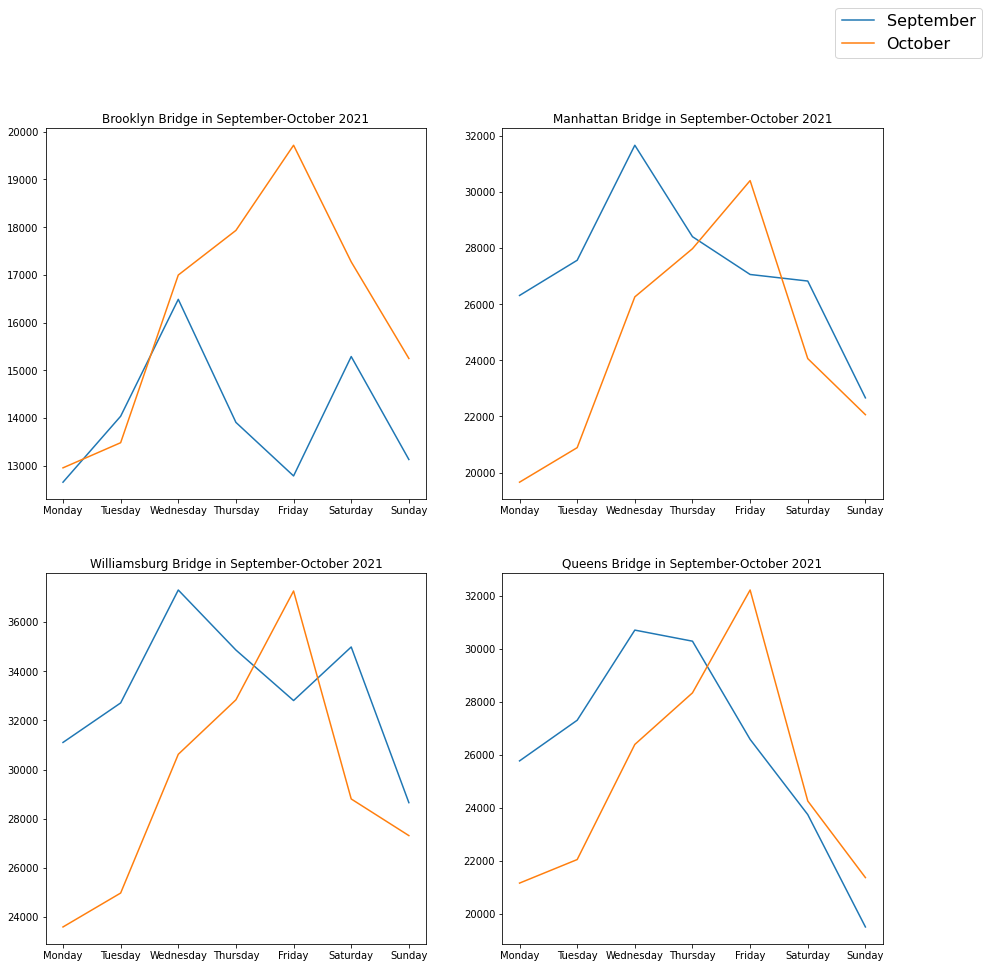

In [ ]:
# visualize weekly riderships in September-October 2021
fig, axs = plt.subplots(2,2, figsize=(15,15))
axs[0,0].plot(bklyn0910.index, bklyn0910)
axs[0,0].set_title('Brooklyn Bridge in September-October 2021')
axs[0,1].plot(manhattan0910.index, manhattan0910)
axs[0,1].set_title('Manhattan Bridge in September-October 2021')
axs[1,0].plot(williams0910.index, williams0910)
axs[1,0].set_title('Williamsburg Bridge in September-October 2021')
axs[1,1].plot(queens0910.index, queens0910)
axs[1,1].set_title('Queens Bridge in September-October 2021')

labels = ['September', 'October']
fig.legend([axs[0,0], axs[0,1], axs[1,0], axs[1,1]], labels=labels,
           loc="upper right", prop={"size":16})
plt.show()

In [ ]:
# citibike September data
citibike = pd.read_csv('/content/drive/MyDrive/PUI project/data/citibike data/202109-citibike-tripdata.csv')
citibike.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,22C33F42C6A0E28E,classic_bike,2021-09-01 10:26:45,2021-09-01 10:43:23,Central Park West & W 72 St,7141.07,E 51 St & 1 Ave,6532.06,40.775794,-73.976206,40.754557,-73.965930,member
1,035F743147FCFCDE,classic_bike,2021-09-04 09:52:40,2021-09-04 10:09:19,William St & Pine St,5065.12,NaN,NaN,40.707179,-74.008873,40.720000,-74.010000,member
2,9C43CF6A07DACBC6,classic_bike,2021-09-06 17:07:40,2021-09-06 17:34:44,Fulton St & Broadway,5175.08,Jay St & Tech Pl,4710.06,40.711066,-74.009447,40.695065,-73.987167,casual
3,253A1A5B20CC78EE,classic_bike,2021-09-28 16:53:43,2021-09-28 17:03:00,West Drive & Prospect Park West,3651.04,Ocean Pkwy & Church Ave,3125.09,40.661063,-73.979453,40.644719,-73.974515,member
4,5E8F164D6798CEFA,classic_bike,2021-09-19 09:37:47,2021-09-19 09:53:42,Lorimer St & Broadway,4965.01,Jay St & Tech Pl,4710.06,40.704118,-73.948186,40.695065,-73.987167,member


In [ ]:
# timestamp types
citibike['started_at'] = pd.to_datetime(citibike['started_at'])
citibike['ended_at'] = pd.to_datetime(citibike['ended_at'])

NameError: ignored

In [ ]:
# extract date, year, day of the week and hour
citibike['Date'] = citibike['started_at'].dt.date
citibike['Month'] = citibike['started_at'].dt.month
citibike['Year'] = citibike['started_at'].dt.year
citibike['DOW'] = citibike['started_at'].dt.dayofweek
citibike['Hour'] = citibike['started_at'].dt.hour

In [ ]:
# calculate trip duration in minutes
citibike['trip_duration'] = (citibike['ended_at'] - citibike['started_at'])
citibike['trip_duration'] = citibike['trip_duration'].dt.total_seconds()/60
citibike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date,Month,Year,DOW,Hour,trip_duration
0,22C33F42C6A0E28E,classic_bike,2021-09-01 10:26:45,2021-09-01 10:43:23,Central Park West & W 72 St,7141.07,E 51 St & 1 Ave,6532.06,40.775794,-73.976206,40.754557,-73.965930,member,2021-09-01,9,2021,2,10,16.633333
1,035F743147FCFCDE,classic_bike,2021-09-04 09:52:40,2021-09-04 10:09:19,William St & Pine St,5065.12,NaN,NaN,40.707179,-74.008873,40.720000,-74.010000,member,2021-09-04,9,2021,5,9,16.650000
2,9C43CF6A07DACBC6,classic_bike,2021-09-06 17:07:40,2021-09-06 17:34:44,Fulton St & Broadway,5175.08,Jay St & Tech Pl,4710.06,40.711066,-74.009447,40.695065,-73.987167,casual,2021-09-06,9,2021,0,17,27.066667
3,253A1A5B20CC78EE,classic_bike,2021-09-28 16:53:43,2021-09-28 17:03:00,West Drive & Prospect Park West,3651.04,Ocean Pkwy & Church Ave,3125.09,40.661063,-73.979453,40.644719,-73.974515,member,2021-09-28,9,2021,1,16,9.283333
4,5E8F164D6798CEFA,classic_bike,2021-09-19 09:37:47,2021-09-19 09:53:42,Lorimer St & Broadway,4965.01,Jay St & Tech Pl,4710.06,40.704118,-73.948186,40.695065,-73.987167,member,2021-09-19,9,2021,6,9,15.916667


In [ ]:
# daily total trip counts and cumulative duration and distance traveled
citibikeDaily = citibike.groupby(['Year','Month','DOW','Date','Hour','start_lat', 'start_lng', 'end_lat', 'end_lng']).\
            agg({'started_at':'count','trip_duration':'sum'}).\
            rename(columns={'started_at':'trip_count'}).reset_index()
citibikeDaily = citibikeDaily = citibikeDaily.sort_values(by='Date')
citibikeDaily.head()

,Year,Month,DOW,Date,Hour,start_lat,start_lng,end_lat,end_lng,trip_count,trip_duration
778754,2021,9,2,2021-09-01,8,40.723180,-73.994800,40.743943,-73.979661,1,10.683333
787375,2021,9,2,2021-09-01,11,40.751184,-73.971387,40.752062,-73.981632,1,17.266667
787374,2021,9,2,2021-09-01,11,40.751184,-73.971387,40.743227,-73.974498,1,5.666667
787373,2021,9,2,2021-09-01,11,40.751102,-73.940737,40.777057,-73.978985,1,19.316667
787372,2021,9,2,2021-09-01,11,40.751102,-73.940737,40.759125,-73.962658,1,7.866667


In [ ]:
# read NYC geopandas
boroboundaries = gpd.read_file('/content/drive/MyDrive/PUI project/data/BoroughBoundaries')
boroboundaries.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,1.0,Manhattan,6.366208e+08,359993.127161,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2.0,Bronx,1.187194e+09,463868.935588,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3.0,Brooklyn,1.934174e+09,728195.194837,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
3,5.0,Staten Island,1.623631e+09,325924.002252,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
4,4.0,Queens,3.040206e+09,900269.281914,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [ ]:
# find most common start and end routes
import folium
citibike_sub = citibike[['start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng']]
citibike_sub['both'] = citibike_sub['start_station_name'] + ',' + citibike_sub['end_station_name']
citibike_sub = citibike_sub.groupby(['start_station_name','start_lat', 'start_lng', 'end_station_name', 'end_lat','end_lng'])['both'].count().reset_index(name='Counts of trips')

citibike_sub = citibike_sub.nsmallest(100, columns=['Counts of trips'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
map1 = folium.Map(
    location=[40.732775,-74.105973],
    tiles='cartodbpositron',
    zoom_start= 12,
)

citibike_sub.apply(lambda row:folium.CircleMarker(location=[row["end_lat"], row["end_lng"]], popup=row["end_station_name"],radius=5, color="Red").add_to(map1), axis=1)
citibike_sub.apply(lambda row:folium.CircleMarker(location=[row["start_lat"], row["start_lng"]],popup=row["start_station_name"]).add_to(map1), axis=1)
map1

folium.Choropleth(
    geo_data=boroboundaries,
    fill_color= '#d5e2f2'
    
).add_to(map1)

folium.LayerControl().add_to(map1)
map1

In [ ]:
# Citibike October data
citibike2 = pd.read_csv('/content/drive/MyDrive/PUI project/data/citibike data/202110-citibike-tripdata.csv')
citibike2.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,353AEA9949A68D49,classic_bike,2021-10-16 12:27:00,2021-10-16 12:45:24,University Pl & E 14 St,5905.14,Franklin St & W Broadway,5430.08,40.734814,-73.992085,40.719116,-74.006667,casual
1,4E99F036F7FE3B62,classic_bike,2021-10-18 16:51:23,2021-10-18 17:19:29,Broadway & Roebling St,5125.07,Sands St Gate,4812.04,40.709248,-73.960631,40.699569,-73.979827,casual
2,2CE9D0504402418A,classic_bike,2021-10-05 13:31:27,2021-10-05 13:47:07,University Pl & E 14 St,5905.14,Franklin St & W Broadway,5430.08,40.734814,-73.992085,40.719116,-74.006667,casual
3,354BB2C25D2FE2DB,classic_bike,2021-10-15 08:28:43,2021-10-15 08:36:37,University Pl & E 14 St,5905.14,8 Ave & W 16 St,6072.11,40.734814,-73.992085,40.740983,-74.001702,casual
4,0211ADD9F91AC315,classic_bike,2021-10-10 00:25:16,2021-10-10 01:04:26,Metropolitan Ave & Meeker Ave,5300.05,Sands St Gate,4812.04,40.714133,-73.952344,40.699569,-73.979827,casual


In [ ]:
# find most common routes in October
citibike_sub2 = citibike2[['start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng']]
citibike_sub2['both'] = citibike_sub2['start_station_name'] + ',' + citibike_sub2['end_station_name']
citibike_sub2 = citibike_sub2.groupby(['start_station_name','start_lat', 'start_lng', 'end_station_name', 'end_lat','end_lng'])['both'].count().reset_index(name='Counts of trips')

citibike_sub2 = citibike_sub2.nsmallest(100, columns=['Counts of trips'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# visualize most common routes in October
map2 = folium.Map(

    location=[40.732775,-74.105973],
    tiles='cartodbpositron',
    zoom_start= 12,
)
citibike_sub2.apply(lambda row:folium.CircleMarker(location=[row["end_lat"], row["end_lng"]], popup=row["end_station_name"],radius=5, color="Red").add_to(map2), axis=1)
citibike_sub2.apply(lambda row:folium.CircleMarker(location=[row["start_lat"], row["start_lng"]],popup=row["start_station_name"]).add_to(map2), axis=1)
map2

folium.Choropleth(
    geo_data=boroboundaries,
    # data= map1,
    fill_color= '#d5e2f2'
    
).add_to(map2)

folium.LayerControl().add_to(map1)
map2

### 5. Has there been a change in public trasportation traffic volume in the three bridges?

In [ ]:

MTA = pd.read_csv('/content/drive/MyDrive/data/MTA_recent_ridership_data_20211206.csv')
MTA.dropna(inplace=True)
MTA


,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of 2019 Monthly Weekday/Saturday/Sunday Average,Metro-North: Total Estimated Ridership,Metro-North: % of 2019 Monthly Weekday/Saturday/Sunday Average,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comprable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day
0,12/6/2021,3138747,55.8%,1269568,61.7%,155000.0,53%,127300.0,48%,21761,72.8%,865595,98.8%
1,12/5/2021,1736742,65.0%,645646,62.4%,72700.0,78%,60500.0,75%,12541,63.9%,818544,99.1%
2,12/4/2021,2317562,65.7%,849763,64.3%,91500.0,81%,81400.0,84%,13317,71.9%,864918,96.5%
3,12/3/2021,3379773,56.7%,1399077,63.6%,144500.0,48%,119400.0,44%,22518,72.7%,940827,96.2%
4,12/2/2021,3365213,55.4%,1436854,62.9%,154700.0,54%,127500.0,49%,22540,68.5%,923179,95.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,4/5/2020,227603,9.1%,299600,30%,3000.0,3%,5600.0,5%,2763,14.4%,209152,23.4%
611,4/4/2020,282703,8.6%,383400,27%,3700.0,3%,8100.0,5%,4375,24.5%,243323,26.0%
612,4/3/2020,484200,8.5%,483800,22%,9700.0,3%,13200.0,5%,7794,27.3%,340273,34.9%
613,4/2/2020,486468,8.2%,472700,20%,10100.0,3%,13700.0,5%,7077,22.5%,339734,34.8%


In [ ]:
# Creating two new columns from the Date column
MTA['Year'] = pd.to_datetime(MTA['Date']).dt.year
MTA['Month'] = pd.to_datetime(MTA['Date']).dt.month

In [ ]:
# Taking only the features we need to use
MTA = MTA[['Year', 'Month', 'Bridges and Tunnels: Total Traffic']]
MTA

,Year,Month,Bridges and Tunnels: Total Traffic
0,2021,12,865595
1,2021,12,818544
2,2021,12,864918
3,2021,12,940827
4,2021,12,923179
...,...,...,...
610,2020,4,209152
611,2020,4,243323
612,2020,4,340273
613,2020,4,339734


In [ ]:
# Splitting the MTA data into two datasets
year_21 = MTA[MTA['Year'] == 2021]
year_20 = MTA[MTA['Year'] == 2020]

# Removing the December from the two datasets because we only have a 6 records from this month in the year 2021
# and removing January and February because there is no records for these two months in year 2020
year_21 = year_21[year_21['Month'] < 12]
year_21 = year_21[year_21['Month'] > 2]
year_20 = year_20[year_20['Month'] < 12]

# Grouping the two datasets by the month
year_21 = year_21.groupby('Month', as_index=False).agg({'Bridges and Tunnels: Total Traffic': 'sum'})
year_20 = year_20.groupby('Month', as_index=False).agg({'Bridges and Tunnels: Total Traffic': 'sum'})

In [ ]:
year_21.drop(axis=0, index=0, inplace=True)


In [ ]:
##We can see that the difference between the total number of traffic in the months has decreased, which means that the increasing rate in traffic in 2021 is getting smaller.

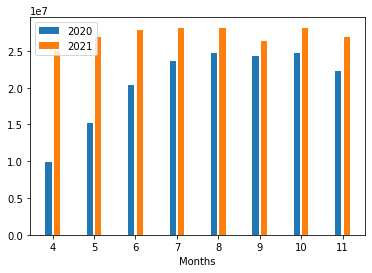

In [ ]:
X_axis = year_20['Month'].values

plt.bar(X_axis - 0.1, year_20['Bridges and Tunnels: Total Traffic'], width=0.15, label = '2020')
plt.bar(X_axis + 0.1, year_21['Bridges and Tunnels: Total Traffic'], width=0.15, label = '2021')
plt.xticks(X_axis)
plt.xlabel('Months')
plt.legend(['2020', '2021']);

### 6. Has the air pollution been reduced when bicycles were commonly used in the bridges areas? 

In [ ]:
AQ = pd.read_csv(r"/content/drive/MyDrive/data/DumboAQ.csv")
AQ.head()

,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9
0,2020-11-12 16:00:00 UTC,23.53,84.32,136.49,7.33,-58.39,70.67,16.06,56.29,NaN
1,2020-11-12 17:00:00 UTC,159.03,403.64,547.14,39.00,-58.70,74.53,15.67,268.34,NaN
2,2020-11-12 18:00:00 UTC,49.76,103.07,123.13,99.00,-59.07,75.00,16.00,69.76,NaN
3,2020-11-12 19:00:00 UTC,12.91,26.38,29.99,159.00,-58.60,75.00,16.00,24.99,NaN
4,2020-11-12 20:00:00 UTC,4.13,8.42,9.91,206.00,-58.71,74.24,15.88,8.42,NaN


In [ ]:
AQ.columns=['created_at', 'PM1_0', 'PM2_5', 'PM10', 'UptimeMinutes', 'RSSI_dbm', 'Temperature_F', 'Humidity_%', 'PM2_5ATM', 'Unnamed']
AQ.drop(columns='Unnamed', inplace=True)
AQ.dropna(inplace=True)
AQ

,created_at,PM1_0,PM2_5,PM10,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2_5ATM
0,2020-11-12 16:00:00 UTC,23.53,84.32,136.49,7.33,-58.39,70.67,16.06,56.29
1,2020-11-12 17:00:00 UTC,159.03,403.64,547.14,39.00,-58.70,74.53,15.67,268.34
2,2020-11-12 18:00:00 UTC,49.76,103.07,123.13,99.00,-59.07,75.00,16.00,69.76
3,2020-11-12 19:00:00 UTC,12.91,26.38,29.99,159.00,-58.60,75.00,16.00,24.99
4,2020-11-12 20:00:00 UTC,4.13,8.42,9.91,206.00,-58.71,74.24,15.88,8.42
...,...,...,...,...,...,...,...,...,...
10285,2021-12-08 15:00:00 UTC,1.24,2.25,2.58,59318.00,-56.00,79.83,21.43,2.25
10286,2021-12-08 16:00:00 UTC,0.85,1.68,1.94,59378.00,-55.37,79.97,22.00,1.68
10287,2021-12-08 17:00:00 UTC,0.60,1.23,1.43,59438.00,-55.63,80.73,21.47,1.23
10288,2021-12-08 18:00:00 UTC,0.42,1.10,1.26,59498.00,-56.43,81.00,21.00,1.10


In [ ]:
AQ['created_at']= pd.to_datetime(AQ['created_at'])
AQ['created_at'] = AQ['created_at'].dt.tz_convert(None)

In [ ]:
AQ

,created_at,PM1_0,PM2_5,PM10,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2_5ATM
0,2020-11-12 16:00:00,23.53,84.32,136.49,7.33,-58.39,70.67,16.06,56.29
1,2020-11-12 17:00:00,159.03,403.64,547.14,39.00,-58.70,74.53,15.67,268.34
2,2020-11-12 18:00:00,49.76,103.07,123.13,99.00,-59.07,75.00,16.00,69.76
3,2020-11-12 19:00:00,12.91,26.38,29.99,159.00,-58.60,75.00,16.00,24.99
4,2020-11-12 20:00:00,4.13,8.42,9.91,206.00,-58.71,74.24,15.88,8.42
...,...,...,...,...,...,...,...,...,...
10285,2021-12-08 15:00:00,1.24,2.25,2.58,59318.00,-56.00,79.83,21.43,2.25
10286,2021-12-08 16:00:00,0.85,1.68,1.94,59378.00,-55.37,79.97,22.00,1.68
10287,2021-12-08 17:00:00,0.60,1.23,1.43,59438.00,-55.63,80.73,21.47,1.23
10288,2021-12-08 18:00:00,0.42,1.10,1.26,59498.00,-56.43,81.00,21.00,1.10


In [ ]:
innauguration = pd.to_datetime('2021-9-14')
before = AQ.loc[AQ['created_at']<innauguration]
after = AQ.loc[AQ['created_at'] >= innauguration]

In [ ]:
#introduce a custom function performing distribution analysis

def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):

    #x - array of observations

    #log_scale - analyze distribution of log(x) if True

    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'

    #bins - how many bins to use for binning the data

    #vis_means - show mean and std lines if True

    #vis_curve - show interpolated distribution curve over the histogram bars if True

    #print_outputs - print mean, std and percentiles

    

    if log_scale: 

        x1 = np.log10(x) #convert data to decimal logarithms

        xlabel = 'log(values)' #reflect in x labels

    else:

        x1 = x #leave original scale 

        xlabel = 'PM 2.5 concentration (ug/mˆ3)'

    mu = x1.mean() #compute the mean

    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean

        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))

    else:

        print('Mean = {:.2f}'.format(mu)) #otherwise print mean

    sigma = x1.std() #compute and output standard deviation 

    print('Standard deviation = {:.2f}'.format(sigma))

    for p in [1,5,25,50,75,95,99]: #output percentile values

        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))

        

    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn

    sns.distplot(x1, hist=True, kde=vis_curve, 

        bins=bins,color = 'darkblue', 

        hist_kws={'edgecolor':'black'},

        kde_kws={'linewidth': 4})

    

    #show vertical lines for mean and std if vis_means = True

    if vis_means:

        plt.axvline(mu, color='r', ls='--', lw=2.0)

        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)

        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)

        

    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 

    #(to make sure the fitted distribution would not affect it)

    

    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution

    pars = None #fitted distribution parameters

    

    #fit and visualize the theoretic distribution

    if fit_distribution == 'normal':

        pars = norm.fit(x1)

        plt.plot(h,norm.pdf(h,*pars),'r')

    elif fit_distribution == 'gev':

        pars = gev.fit(x1)

        plt.plot(h,gev.pdf(h,*pars),'r')

    elif fit_distribution == 'pareto':

        pars = pareto.fit(x1)

        plt.plot(h,pareto.pdf(h,*pars),'r')

    

    plt.xlabel(xlabel) #add x label 

    plt.xlim(0 )

    plt.ylim(ylim) #restore the y-range of original distribution density values 

    plt.show()

    return pars

Mean = 11.42
Standard deviation = 14.63
1 percentile = 0.02
5 percentile = 0.19
25 percentile = 2.08
50 percentile = 6.72
75 percentile = 16.87
95 percentile = 35.39
99 percentile = 52.19


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


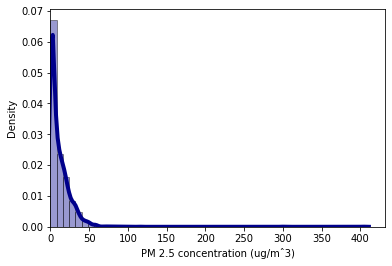

Mean = 4.31
Standard deviation = 13.88
1 percentile = 0.01
5 percentile = 0.04
25 percentile = 0.42
50 percentile = 1.40
75 percentile = 3.60
95 percentile = 14.27
99 percentile = 53.50


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


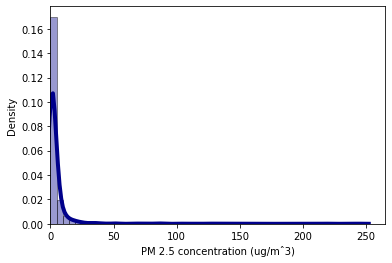

In [ ]:
distribution_analysis(before.PM2_5, bins=50, vis_means=False)
distribution_analysis(after.PM2_5, bins=50, vis_means=False)

Mean = 11.42
Standard deviation = 14.63
1 percentile = 0.02
5 percentile = 0.19
25 percentile = 2.08
50 percentile = 6.72
75 percentile = 16.87
95 percentile = 35.39
99 percentile = 52.19


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


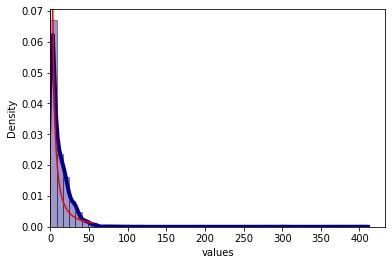

Mean = 4.31
Standard deviation = 13.88
1 percentile = 0.01
5 percentile = 0.04
25 percentile = 0.42
50 percentile = 1.40
75 percentile = 3.60
95 percentile = 14.27
99 percentile = 53.50


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


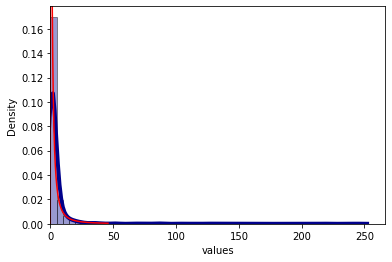

(1.116530281766786, -1.382056485916812, 1.3820564749866096)

In [ ]:
distribution_analysis(before.PM2_5, bins=50, vis_means=False, fit_distribution='pareto')
distribution_analysis(after.PM2_5, bins=50, vis_means=False, fit_distribution='pareto')

In [ ]:
stats.ttest_ind(before['PM2_5'], after['PM2_5'])

Ttest_indResult(statistic=22.279834347191336, pvalue=1.9638785204977817e-107)

In [ ]:
stats.ks_2samp(before['PM2_5'], after['PM2_5'])

Ks_2sampResult(statistic=0.4103138030743455, pvalue=9.932767485619254e-299)